In [8]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

# Dane 

In [65]:
sentences = []
for i in range(1000000):
    start = np.random.randint(0, 10)
    finish = start + np.random.randint(3, 20)
    sentence = [str(x) for x in range(start, finish)]
    sentences.append(sentence)

In [12]:
sentences

[['2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19'],
 ['4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17'],
 ['7', '8', '9'],
 ['9', '10', '11', '12', '13', '14', '15', '16', '17'],
 ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']]

# Model Word2Vec

In [80]:
model = Word2Vec(sentences, size=15, window=4, min_count=1)

In [81]:
model.wv['1']

array([ 0.38587353,  0.3466356 ,  1.2781239 , -1.4127017 ,  1.2754539 ,
       -3.8882532 ,  5.324599  ,  4.769799  , -2.7322857 , -1.3530663 ,
        2.2104414 , -5.120533  , -2.0768723 , -3.2962992 , -2.7537506 ],
      dtype=float32)

In [82]:
def plot_heatmap(model):
    plt.figure(figsize=(15, 8))
    sns.heatmap(model.wv[model.wv.vocab], linewidths = 0.5)

<IPython.core.display.Javascript object>


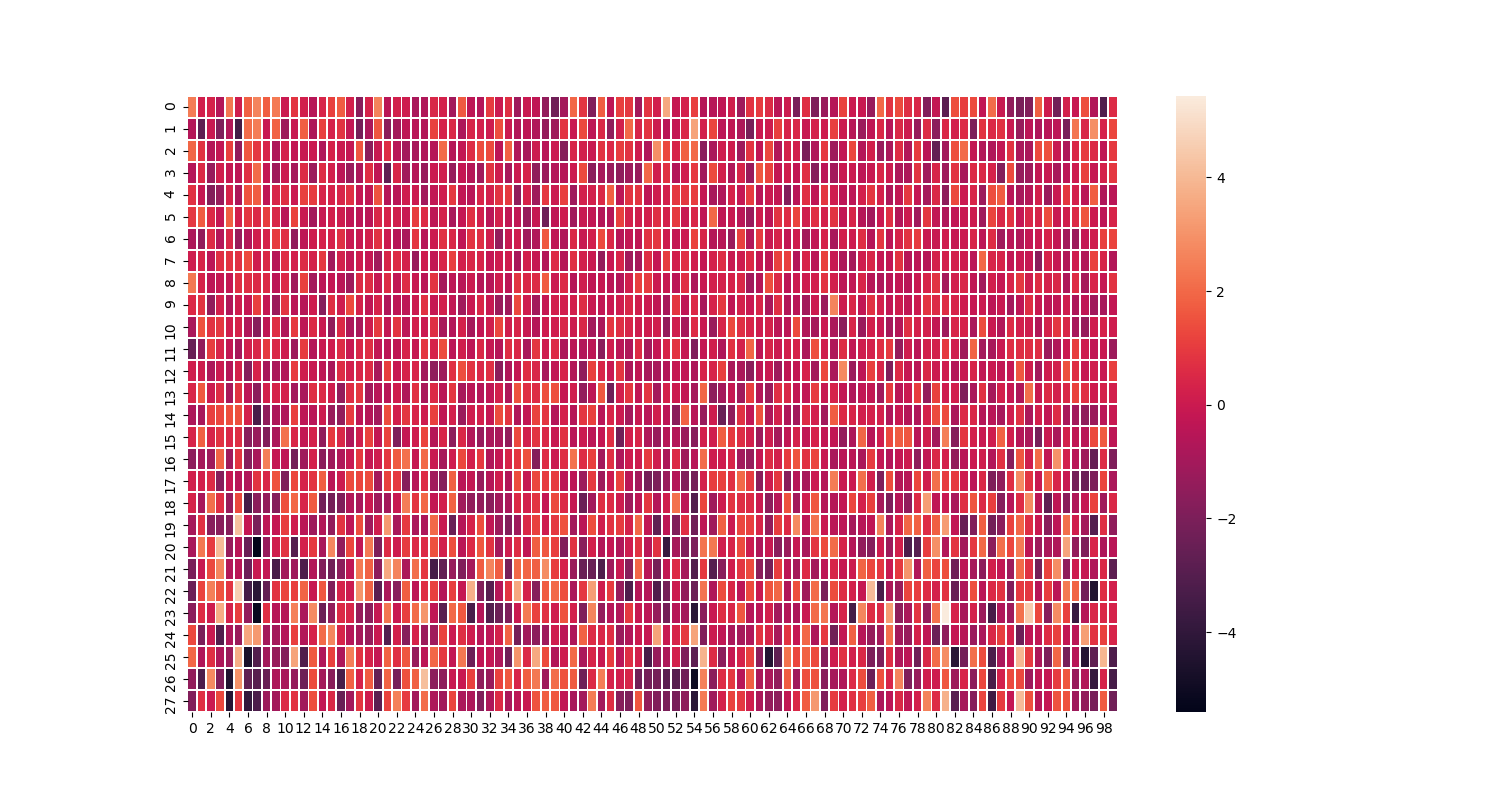

In [68]:
plot_heatmap(model)

In [69]:
def plot_pca(model):
    X = model.wv[model.wv.vocab]
    pca_model = PCA(n_components=2)
    result = pca_model.fit_transform(X)

    plt.figure(figsize=(8,5))
    plt.scatter(result[:,0], result[:,1])

    words = list(model.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

<IPython.core.display.Javascript object>


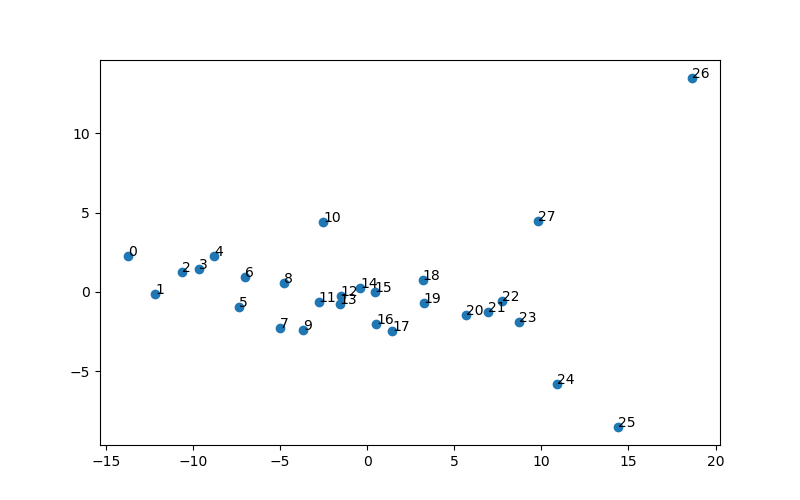

In [83]:
plot_pca(model)

In [84]:
model.most_similar('3', topn=3)

/home/sendivogius/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('0', 0.5584084391593933),
 ('8', 0.5399368405342102),
 ('1', 0.510499894618988)]

In [85]:
model.wv.most_similar(positive=['10', '8'], negative=['6'], topn=3)

[('26', 0.31558310985565186),
 ('4', 0.20521268248558044),
 ('3', 0.1972539871931076)]